In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('10-11.csv')
df.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,STL,BLK,BLKA,PF,PFD,PTD,Year,Conference,Playoffs,Championship
0,60,Chicago Bulls,82,62,20,0.756,48.4,98.6,37.1,80.3,...,7.2,5.7,5.8,20.0,20.1,7.3,2010,Eastern,1,0
1,61,San Antonio Spurs,82,61,21,0.744,48.2,103.7,38.4,80.8,...,7.3,4.5,4.6,19.0,20.7,5.7,2010,Western,1,0
2,62,Miami Heat,82,58,24,0.707,48.2,102.1,37.0,76.8,...,6.6,5.2,3.0,20.4,21.8,7.5,2010,Eastern,1,0
3,63,Dallas Mavericks,82,57,25,0.695,48.1,100.2,37.4,78.8,...,6.8,4.3,3.7,19.2,20.1,4.2,2010,Western,1,1
4,64,Los Angeles Lakers,82,57,25,0.695,48.4,101.5,38.1,82.4,...,7.3,5.1,4.5,19.0,20.7,6.1,2010,Western,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   TEAM          30 non-null     object 
 2   GP            30 non-null     int64  
 3   W             30 non-null     int64  
 4   L             30 non-null     int64  
 5   WIN%          30 non-null     float64
 6   MIN           30 non-null     float64
 7   PTS           30 non-null     float64
 8   FGM           30 non-null     float64
 9   FGA           30 non-null     float64
 10  FG%           30 non-null     float64
 11  3PM           30 non-null     float64
 12  3PA           30 non-null     float64
 13  3P%           30 non-null     float64
 14  FTM           30 non-null     float64
 15  FTA           30 non-null     float64
 16  FT%           30 non-null     float64
 17  OREB          30 non-null     float64
 18  DREB          30 non-null     fl

## EDA

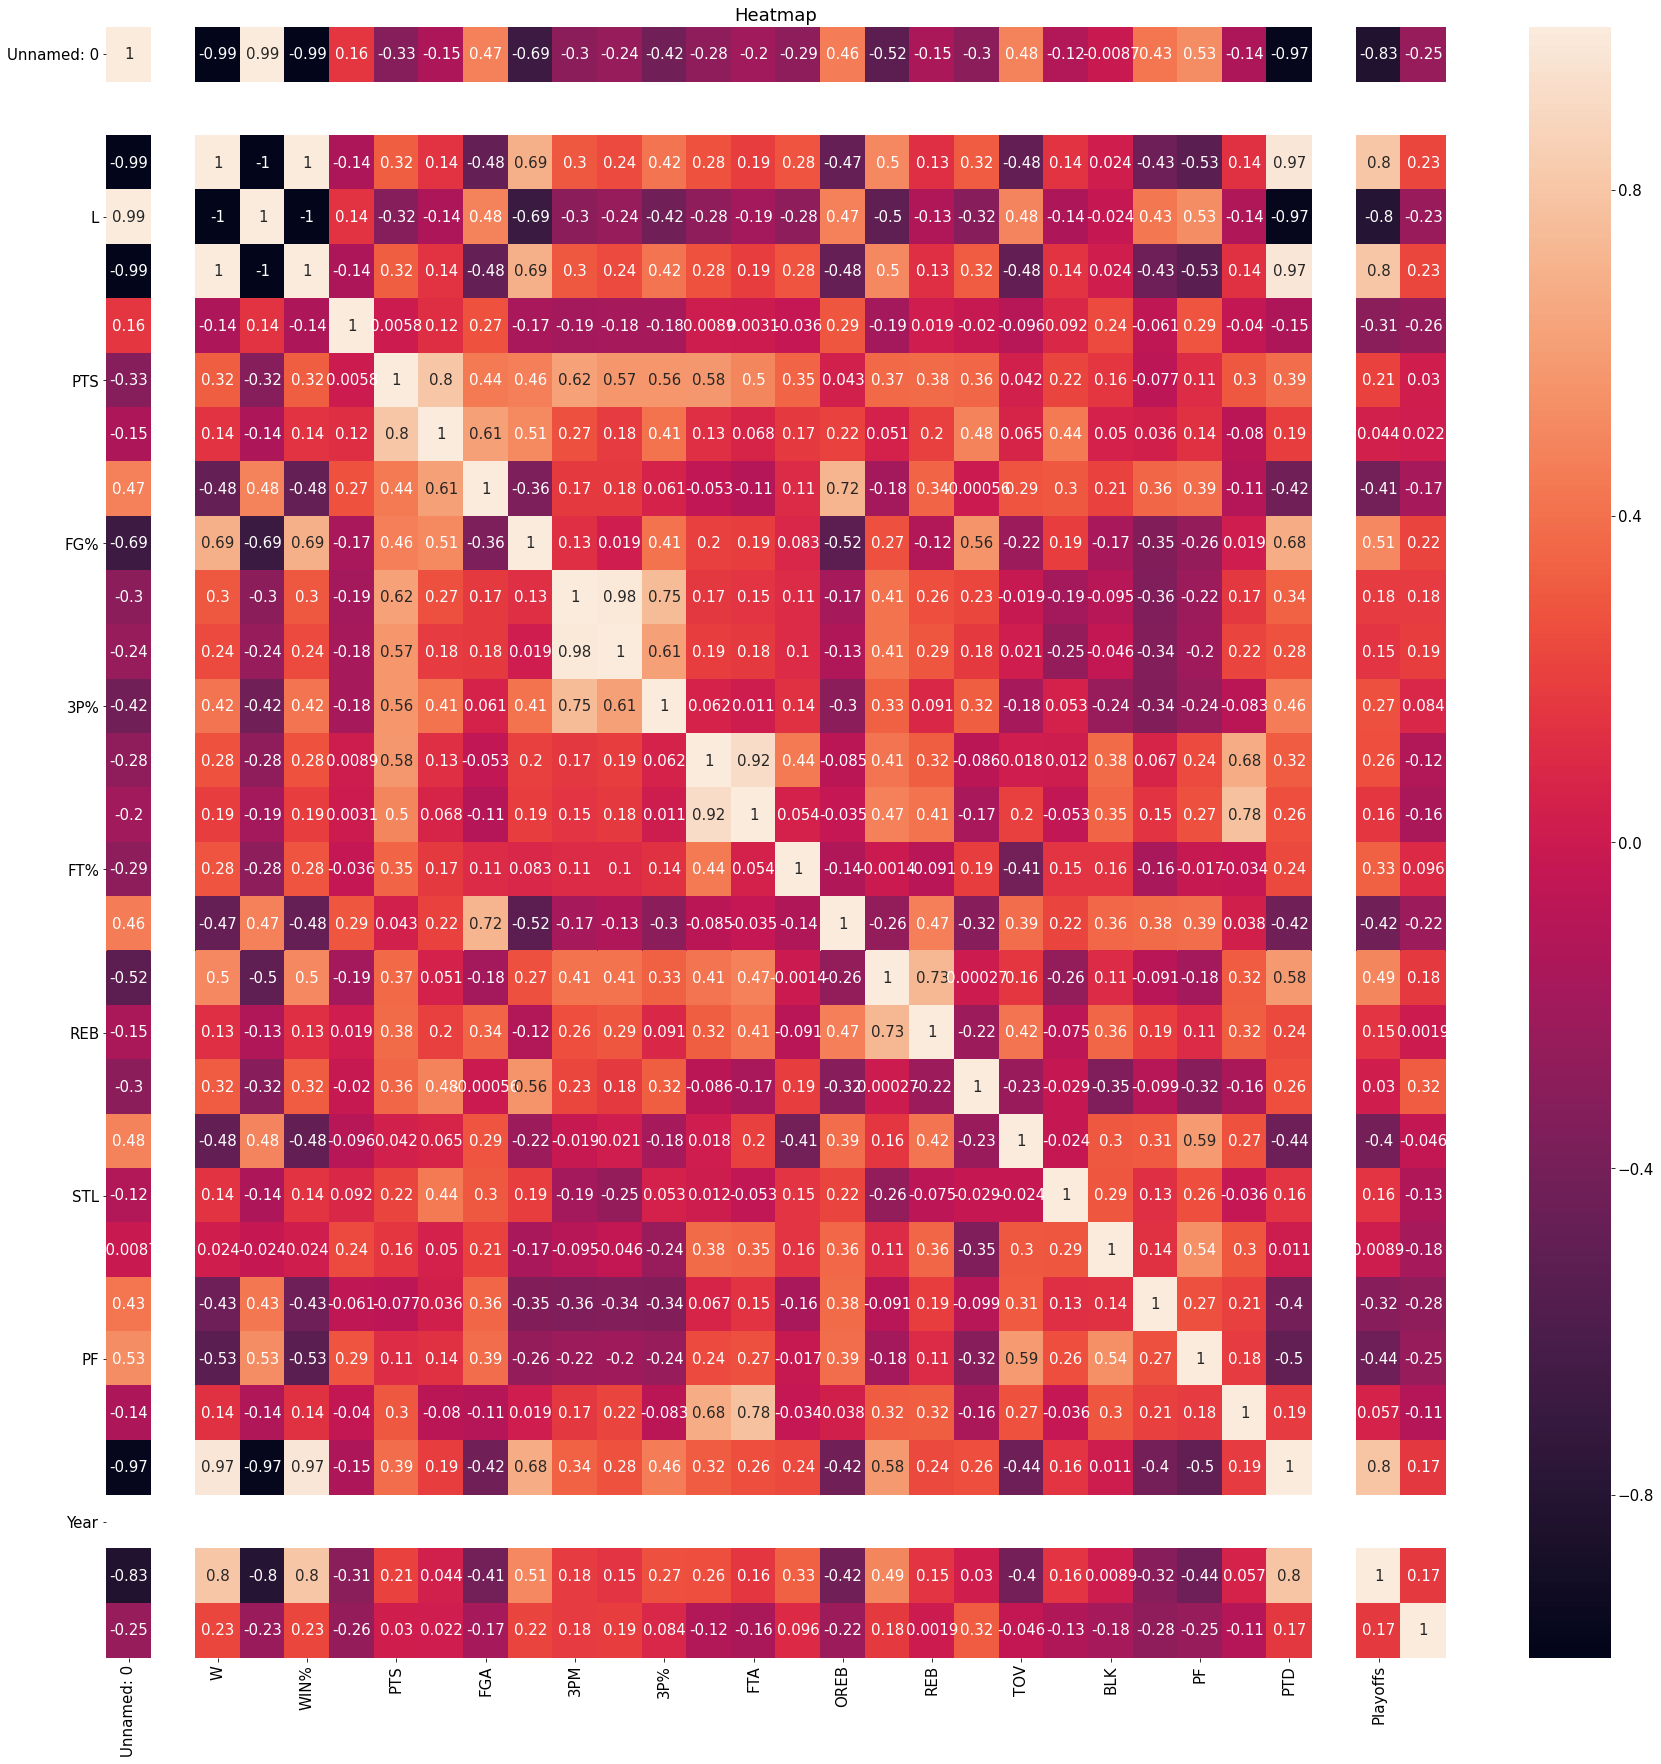

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

## Random Forest Regression

In [6]:
target_column = 'WIN%'
feature_columns = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
y = df[target_column]
X = df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 10/30)

In [7]:
start = time.time()
print('start')
print()
rfr_param_grid = {'n_estimators':[10,50,100,200,500], 'max_depth': [1,2,3,4,5,6]}
rfr = RandomForestRegressor(random_state=0)
grid_rfr = GridSearchCV(rfr, param_grid=rfr_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rfr.fit(X_train, y_train)
grid_rfr_mse_train = grid_rfr.score(X_train, y_train)
grid_rfr_mse = grid_rfr.score(X_test, y_test)
print('Best Parameters:', grid_rfr.best_params_)
print()
print('Train MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse_train)
print()
print('Test MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse)
print()
print('end')
print()
end = time.time()
print(end - start)

start

Best Parameters: {'max_depth': 2, 'n_estimators': 200}

Train MSE score for the Random Forest Regression Model with the best parameters above: -0.0033

Test MSE score for the Random Forest Regression Model with the best parameters above: -0.0179

end

26.87608790397644


In [8]:
rfr_best_param_model = RandomForestRegressor(n_estimators=200, max_depth=2, random_state=0)
rfr_best_param_model.fit(X_train, y_train)
rfr_best_param_model_predictions = rfr_best_param_model.predict(X_test)
print('Mean Squared Error with the Best Parameters From Above:', mean_squared_error(y_true=y_test,y_pred=rfr_best_param_model_predictions))

Mean Squared Error with the Best Parameters From Above: 0.01794197027312968


In [9]:
df_feature_importances = pd.DataFrame(rfr_best_param_model.feature_importances_, 
                                      index = X_train.columns, 
                                      columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
df_feature_importances

,index,Importance
0,FG%,0.326022
1,DREB,0.226499
2,FGA,0.103108
3,AST,0.053141
4,OREB,0.042785
5,REB,0.041849
6,BLKA,0.036534
7,TOV,0.035185
8,FT%,0.022759
9,PF,0.021646


In [10]:
dump(rfr_best_param_model,filename='2010-2011 Random Forest Regressor.joblib')

['2010-2011 Random Forest Regressor.joblib']